In [31]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_iris
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [32]:
iris = load_iris()
X = iris.data[:, :2]  # Using Sepal Length & Width for 2D visualization
y = iris.target

In [33]:
X += np.random.normal(0, 0.15, X.shape)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)


In [34]:
model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


In [35]:
print("KNN Classification Results:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


KNN Classification Results:
Accuracy: 0.6888888888888889
Confusion Matrix:
 [[14  0  0]
 [ 0  9  9]
 [ 0  5  8]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.64      0.50      0.56        18
           2       0.47      0.62      0.53        13

    accuracy                           0.69        45
   macro avg       0.70      0.71      0.70        45
weighted avg       0.70      0.69      0.69        45



In [36]:
h = .02
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

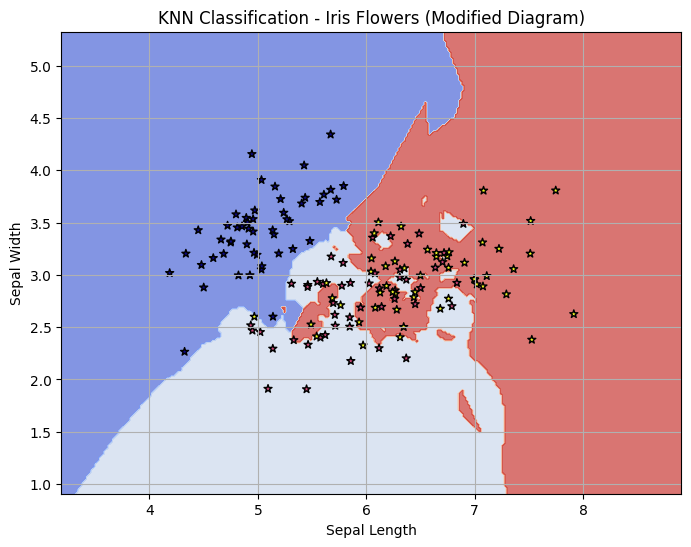

In [37]:
plt.figure(figsize=(8,6))
plt.contourf(xx, yy, Z, cmap='coolwarm', alpha=0.7)  # Changed color map
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='plasma', edgecolor='k', marker='*')  # Changed dots to stars
plt.title("KNN Classification - Iris Flowers (Modified Diagram)")
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.grid(True)
plt.show()